In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [36]:
# import boto3
# import pandas as pd
# from io import StringIO

# # Define S3 bucket and file details
# bucket_name = "refocus-ai"
# file_key = "insurance-data-raw/insurance_data_2025-02-11_02-45-54.csv"

# # Create S3 client
# s3 = boto3.client("s3")

# # Read CSV file from S3
# obj = s3.get_object(Bucket=bucket_name, Key=file_key)
# csv_data = obj["Body"].read().decode("utf-8")

# # Convert CSV data to pandas DataFrame
# df = pd.read_csv(StringIO(csv_data))

# # Display DataFrame
# print(df.head())


ClientError: An error occurred (AccessDenied) when calling the GetObject operation: Access Denied

In [23]:
# Load the dataset
file_path = "data/inputs/insurance_data.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     1000 non-null   int64 
 1   age             1000 non-null   int64 
 2   annual_premium  1000 non-null   int64 
 3   policy_type     1000 non-null   object
 4   claims_count    1000 non-null   int64 
 5   churn           1000 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 47.0+ KB


In [24]:
df.head()

,customer_id,age,annual_premium,policy_type,claims_count,churn
0,1,36,2386,auto,1,0
1,2,66,2684,home,3,0
2,3,28,3673,auto,4,0
3,4,34,3483,life,3,0
4,5,56,3448,auto,3,0


In [29]:
# Check for duplicate rows in the dataset
duplicate_rows = df[df.duplicated()]

In [25]:
# Summary statistics
summary_stats = df.describe()
summary_stats

,customer_id,age,annual_premium,claims_count,churn
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,47.441000,2736.553000,2.059000,0.204000
std,288.819436,16.365951,1291.145489,1.411918,0.403171
min,1.000000,18.000000,502.000000,0.000000,0.000000
25%,250.750000,34.000000,1636.750000,1.000000,0.000000
50%,500.500000,48.000000,2713.000000,2.000000,0.000000
75%,750.250000,62.000000,3837.000000,3.000000,0.000000
max,1000.000000,74.000000,4996.000000,4.000000,1.000000


In [26]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

customer_id       0
age               0
annual_premium    0
policy_type       0
claims_count      0
churn             0
dtype: int64

In [ ]:
# Churn distribution
class_distribution = df["churn"].value_counts(normalize=True)
class_distribution


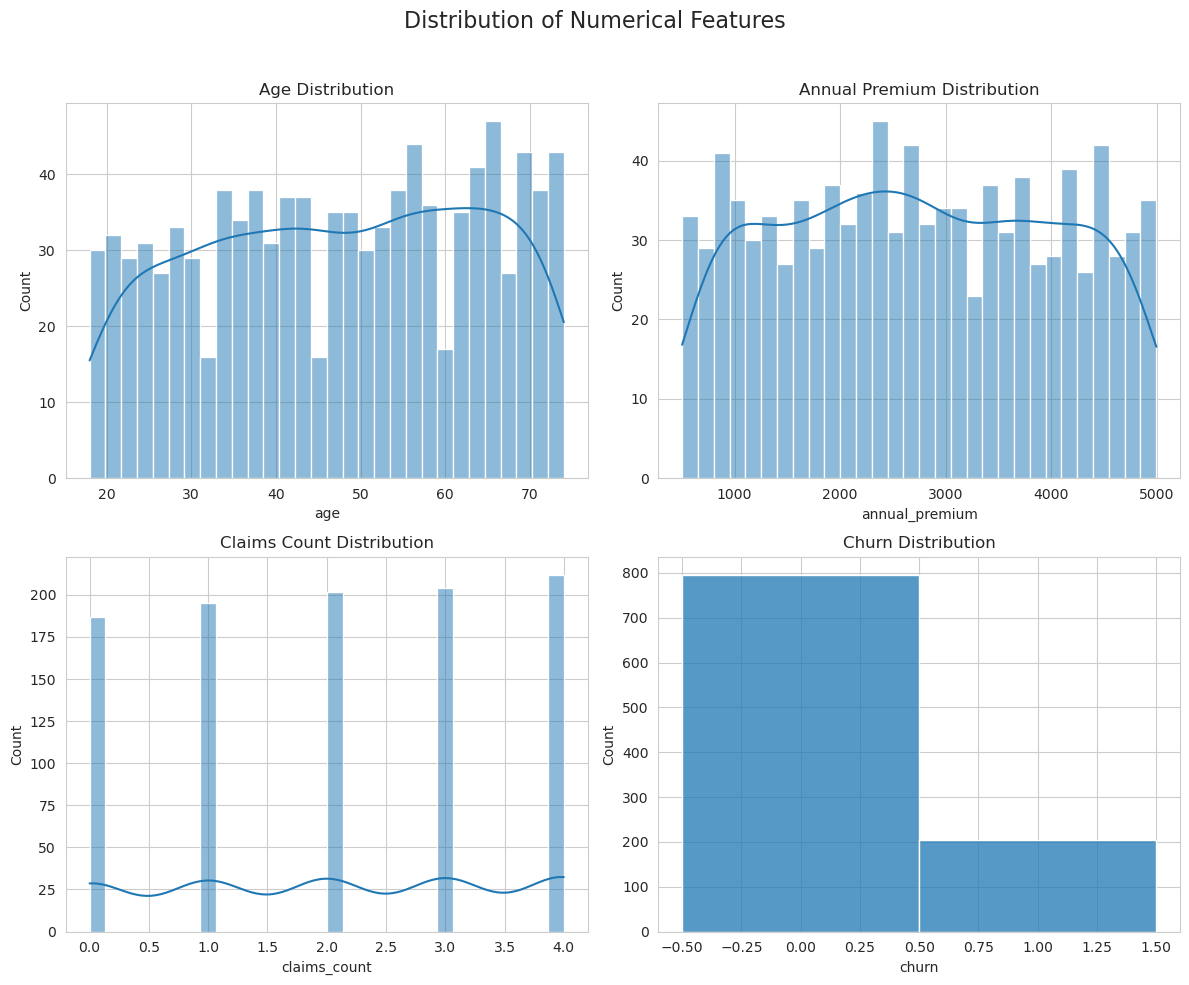

In [27]:
# Distribution of numerical features
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Distribution of Numerical Features", fontsize=16)

sns.histplot(df["age"], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Age Distribution")

sns.histplot(df["annual_premium"], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Annual Premium Distribution")

sns.histplot(df["claims_count"], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Claims Count Distribution")

sns.histplot(df["churn"], bins=3, discrete=True, ax=axes[1, 1])
axes[1, 1].set_title("Churn Distribution")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

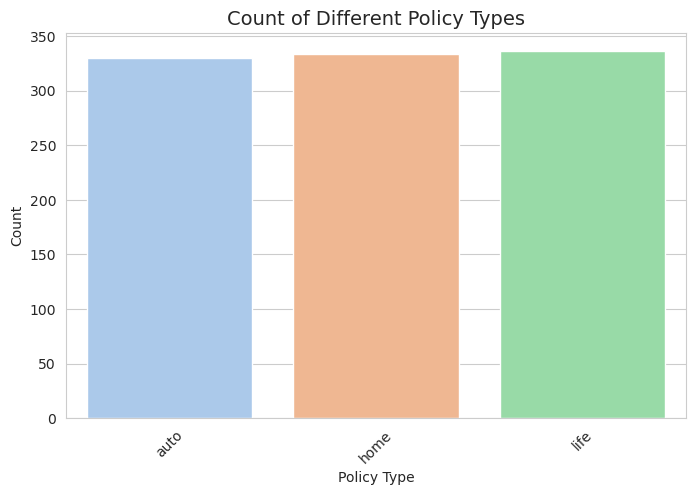

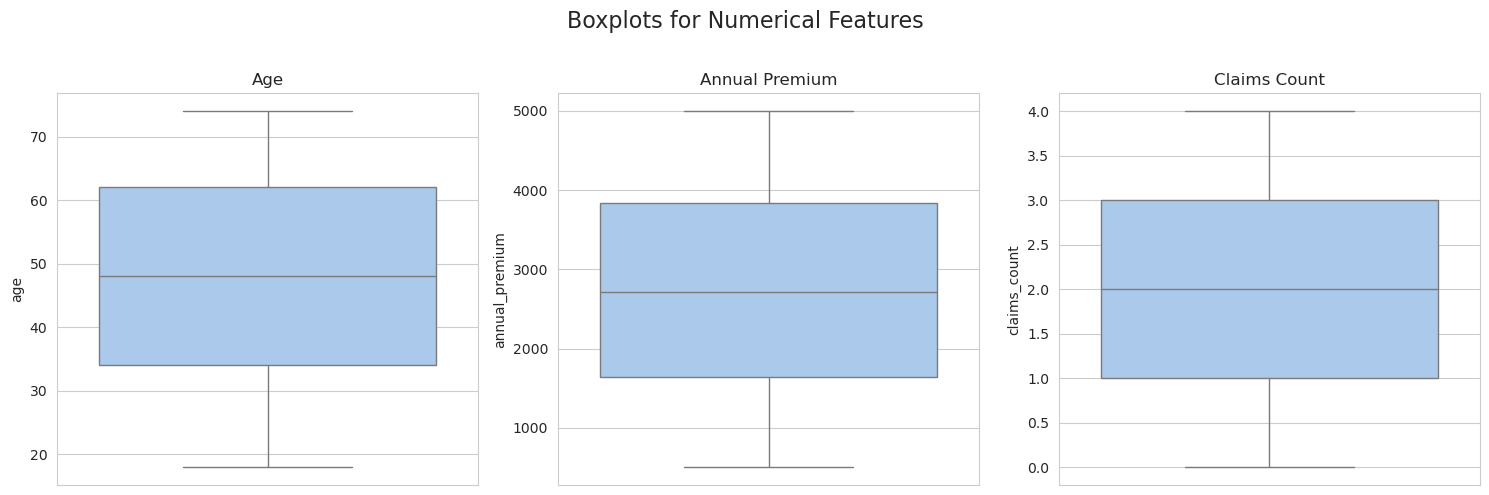

In [28]:
# Countplot for categorical variable "policy_type"
plt.figure(figsize=(8, 5))
sns.countplot(x=df["policy_type"], palette="pastel")
plt.title("Count of Different Policy Types", fontsize=14)
plt.xlabel("Policy Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Boxplots to check outliers in numerical features
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Boxplots for Numerical Features", fontsize=16)

sns.boxplot(y=df["age"], ax=axes[0], palette="pastel")
axes[0].set_title("Age")

sns.boxplot(y=df["annual_premium"], ax=axes[1], palette="pastel")
axes[1].set_title("Annual Premium")

sns.boxplot(y=df["claims_count"], ax=axes[2], palette="pastel")
axes[2].set_title("Claims Count")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()